# Introducción a Pandas: Segunda parte

De nuevo, vamos a importar los datos de los precios de alquileres en los distritos de Madrid:

In [1]:
import pandas as pd

alquiler = pd.read_csv('alquiler-madrid-distritos.csv', index_col=False)
alquiler.head()

,distrito,anyo,cuatrimestre,precio
0,Arganzuela,2007,2,13.066587
1,Barajas,2007,2,11.199855
2,Carabanchel,2007,2,11.127661
3,Centro,2007,2,17.746404
4,Chamartín,2007,2,14.386480


## Resumen estadístico

Pandas provee una serie de funciones de resumen estadístico que podemos aplicar sobre una columna concreta, o sobre todas las del DataFrame.

Para un resumen para todas las columnas de número de filas, media, desviación estándar, cuartiles, ... usamos [`describe`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.describe.html)

In [2]:
alquiler.describe()

,anyo,cuatrimestre,precio
count,840.00000,840.00000,840.000000
mean,2012.90000,2.52500,11.545779
std,3.08242,1.11842,2.271275
min,2007.00000,1.00000,7.591541
25%,2010.75000,2.00000,9.853159
50%,2013.00000,2.00000,11.132781
75%,2015.25000,4.00000,12.996690
max,2018.00000,4.00000,19.308607


Podemos utilizar también `sum`, `mean`, `std`, `count`, `min`, `max`, ... sobre el DataFrame o una columna en concreto

In [3]:
alquiler.mean()

anyo            2012.900000
cuatrimestre       2.525000
precio            11.545779
dtype: float64

In [4]:
alquiler.precio.max()

19.3086068151837

## Agrupación

También podemos agregar las tablas por un determinado criterio y sacar resúmenes de los grupos. Esta operación se hace en dos fases:

* El `groupby`: donde especificamos la o las columnas por las que agregar
* La aplicación de la función de agregación sobre una o varias columnas

Un resumen usando una función de agregación sobre todas las columnas del DataFrame

In [5]:
alquiler.groupby('anyo').max()

# Atención, fíjate bien en lo que hace esto. Saca el valor máximo de distrito (alfabéticamente),
#  de cuatrimestre y precio (numéricamente), pero no representa filas completas
# Es decir, Villaverde en el cuatrimestre 4 no tuvo ese precio

,distrito,cuatrimestre,precio
anyo,,,
2007,Villaverde,4,18.044594
2008,Villaverde,4,17.618608
2009,Villaverde,4,15.788713
2010,Villaverde,4,15.564614
2011,Villaverde,4,15.078333
2012,Villaverde,4,14.822377
2013,Villaverde,4,13.704467
2014,Villaverde,4,13.965912
2015,Villaverde,4,15.251220


Para hacerlo únicamente sobre una columna:

In [6]:
alquiler.groupby('anyo').precio.min()

#Aquí sí se muestra el precio mínimo de todos los distritos en cada año

anyo
2007     9.592651
2008    10.628444
2009     9.764769
2010     9.279254
2011     9.089262
2012     8.693941
2013     7.933318
2014     7.591541
2015     7.754823
2016     8.183480
2017     9.210458
2018     9.962139
Name: precio, dtype: float64

Para aplicar diferentes resúmenes sobre diferentes columnas podemos usar `agg` con la operación que se desea realizar para cada columna:

In [7]:
tmp = alquiler.groupby('anyo').agg({'precio': 'mean', 'distrito': 'first'})
tmp

,precio,distrito
anyo,,
2007,12.679226,Arganzuela
2008,12.963422,Arganzuela
2009,11.900691,Arganzuela
2010,11.608368,Arganzuela
2011,11.461966,Arganzuela
2012,11.021184,Arganzuela
2013,10.382165,Arganzuela
2014,10.252846,Arganzuela
2015,10.689535,Arganzuela


Puedes ver más información sobre agrupaciones en la [documentación de pandas](https://pandas.pydata.org/pandas-docs/stable/groupby.html). Es especialmente útil la parte sobre transformaciones.

## Cruce

Podemos cruzar dos tablas por una o varias columnas en pandas con [`merge`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.merge.html). También podemos usar los distintos tipos de cruce:

* `inner`: para obtener solamente los registros que crucen en ambas tablas (valor por defecto)
* `left` o `right`: para mantener los registros de una de las dos tablas, crucen o no con la otra
* `outer`: para mantener los registros de ambas tablas, crucen o no

In [8]:
# Aquí, además, un ejemplo de cómo crear un dataframe a partir de un diccionario
df_ejemplo = pd.DataFrame({'distrito':  ['Moratalaz', 'Centro', 'Barajas'],
                           'poblacion': [95000, 150000, 46000]})
df_ejemplo

,distrito,poblacion
0,Moratalaz,95000
1,Centro,150000
2,Barajas,46000


In [20]:
tmp = df_ejemplo.merge(alquiler, on='distrito', how='inner')  #Sería lo mismo hacer: df_ejemplo.merge(alquiler, on='distrito')
tmp.head()

,distrito,poblacion,anyo,cuatrimestre,precio
0,Moratalaz,95000,2007,2,11.498611
1,Moratalaz,95000,2007,4,11.117894
2,Moratalaz,95000,2008,2,11.925685
3,Moratalaz,95000,2008,4,10.966299
4,Moratalaz,95000,2009,2,10.229014


En este caso, solamente tenemos en el dataframe `tmp` las filas de los distritos que aparecen en ambos dataframes

In [10]:
len(tmp)

120

In [11]:
tmp = df_ejemplo.merge(alquiler, on='distrito', how='right')
tmp.tail()

,distrito,poblacion,anyo,cuatrimestre,precio
835,Tetuan,NaN,2018,2,15.114558
836,Usera,NaN,2018,2,11.533458
837,Vicálvaro,NaN,2018,2,9.962139
838,Villa De Vallecas,NaN,2018,2,10.915967
839,Villaverde,NaN,2018,2,10.427527


En este caso, tenemos en el dataframe `tmp` las filas de los distritos que aparecen en el dataframe `alquiler`. Para los distritos que no aparecen en el dataframe `df_ejemplo` tenemos el valor NaN en la columna `poblacion`

In [12]:
len(tmp)

840

## Visualización

Si ya tenemos los datos en un `DataFrame` y no necesitamos gráficos muy específicos, podemos utilizar la función [`plot`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html) que ofrece `pandas`.

Aplicando la función `plot` sobre el DataFrame obtenemos un gráfico de todas las columnas.

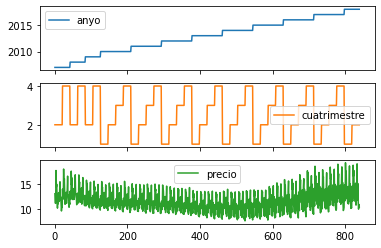

In [13]:
out = alquiler.plot(subplots=True)

En la documentación de [`plot`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html) se indica cómo modificar los parámetros fundamentales del gráfico, como a continuación:

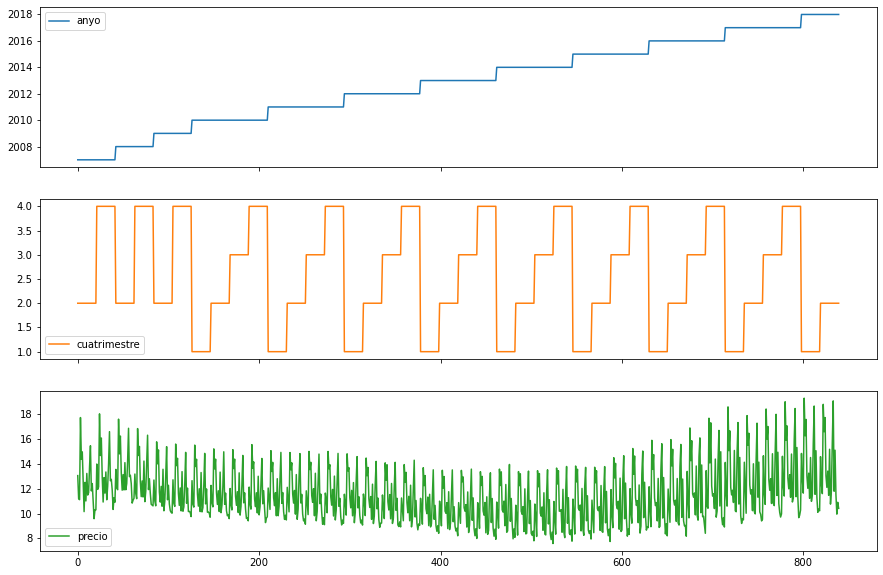

In [14]:
out = alquiler.plot(subplots=True, figsize = (15, 10))

Podemos pintar un gráfico especificando el tipo, el eje x y el eje y. Por ejemplo, para ver la evolución del precio a comienzo de cada año en un distrito concreto.

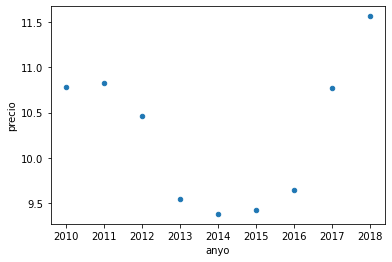

In [15]:
out = alquiler[(alquiler.distrito == 'San Blas') & (alquiler.cuatrimestre == 1)].plot(kind='scatter', x='anyo', y='precio')

Ejemplo de un histograma sobre la columna `precio`, restringiendo por año y cuatrimestre:

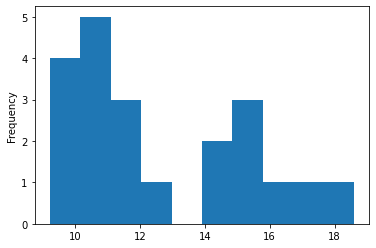

In [16]:
out = alquiler[(alquiler.anyo == 2017) & (alquiler.cuatrimestre == 1)].precio.plot(kind='hist')

In [17]:
alquiler[(alquiler.anyo == 2017) & (alquiler.cuatrimestre == 1)].sort_values('precio')  #Datos utilizados para el histograma

,distrito,anyo,cuatrimestre,precio
732,Vicálvaro,2017,1,9.210458
734,Villaverde,2017,1,9.494562
733,Villa De Vallecas,2017,1,9.601610
731,Usera,2017,1,9.832728
726,Puente De Vallecas,2017,1,10.155772
725,Moratalaz,2017,1,10.229891
716,Carabanchel,2017,1,10.608362
729,San Blas,2017,1,10.774331
723,Latina,2017,1,10.899324
721,Fuencarral,2017,1,11.508508


Para los histogramas y boxplots tenemos una interfaz más avanzada que podemos usar:

* [`boxplot`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.boxplot.html)
* [`hist`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.hist.html)

Por ejemplo, para pintar los boxplots de precios por distrito.

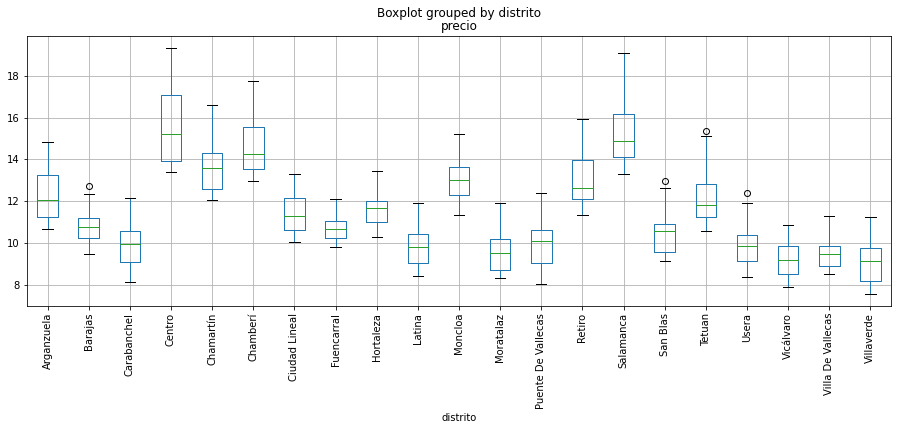

In [18]:
out = alquiler.boxplot('precio', by='distrito', figsize=(15, 5), rot=90)